<h1><center>Fig6 stats

This notebook contains statistical analysis of the data from the figure 6.

# Install libraries

Install all necessary libraries to run statistical tests in R.

In [ ]:
# Use R in Jupyter Notebook
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("readxl")
install.packages("ggplot2")

In [ ]:
%%R
library("readxl")
library("ggplot2")

# Directory

Set directory with the source data. Mount disk if you use Google Colab.

In [ ]:
# Mount disk if you use Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/sourcedata

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/sourcedata


# Fig6C


In [ ]:
%%R
df <- read_excel("fig6_ephys.xlsx", sheet = "voltageClamp")
df$cell = as.character(df$cell)
df$drug = as.factor(df$drug)
df$peakAmplitude = as.numeric(df$peakAmplitude)

In [ ]:
%%R
epsc <- df[df$holdingPotential==-60, ]
epsc <- epsc[epsc$drug!="Gabazine", ]
acsf <- epsc[epsc$drug=="ACSF", ]$peakAmplitude
nbqx <- epsc[epsc$drug=="NBQX", ]$peakAmplitude

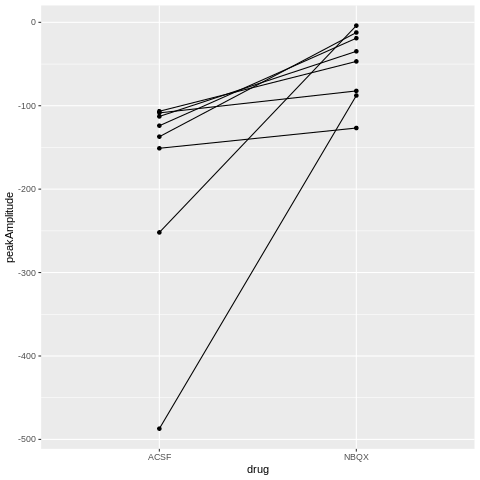

In [ ]:
%%R
ggplot(epsc, aes(x=drug, y=peakAmplitude)) +
  geom_point() +
  geom_line(aes(group=cell))

In [ ]:
%%R
wilcox.test(acsf,nbqx, paired=TRUE)


	Wilcoxon signed rank exact test

data:  acsf and nbqx
V = 0, p-value = 0.007813
alternative hypothesis: true location shift is not equal to 0



# Fig6D


In [ ]:
%%R
df <- read_excel("fig6_ephys.xlsx", sheet = "voltageClamp")
df$cell = as.character(df$cell)
df$drug = as.factor(df$drug)
df$peakAmplitude = as.numeric(df$peakAmplitude)

In [ ]:
%%R
ipsc <- df[df$holdingPotential==0, ]
ipsc <- ipsc[ipsc$drug!="NBQX", ]
acsf <- ipsc[ipsc$drug=="ACSF", ]$peakAmplitude
gabazine <- ipsc[ipsc$drug=="Gabazine", ]$peakAmplitude

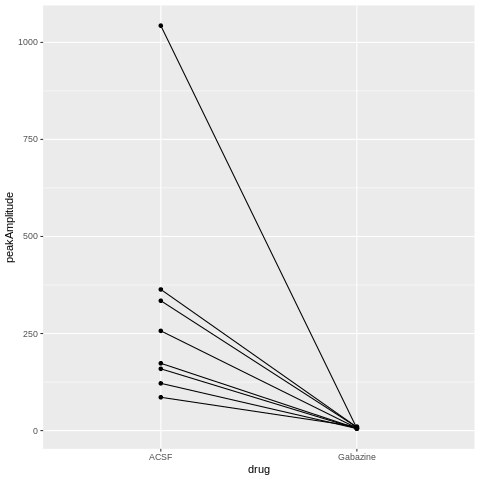

In [ ]:
%%R
ggplot(ipsc, aes(x=drug, y=peakAmplitude)) +
  geom_point() +
  geom_line(aes(group=cell))

In [ ]:
%%R
wilcox.test(acsf,gabazine, paired=TRUE)


	Wilcoxon signed rank exact test

data:  acsf and gabazine
V = 36, p-value = 0.007813
alternative hypothesis: true location shift is not equal to 0



# Fig6E


In [ ]:
%%R
df <- read_excel("fig6_ephys.xlsx", sheet = "currentClamp")
df$cell = as.character(df$cell)
df$drug = as.factor(df$drug)
df$peakAmplitude = as.numeric(df$peakAmplitude)

In [ ]:
%%R
acsf <- df[df$drug=="ACSF", ]$peakAmplitude
gabazine <- df[df$drug=="Gabazine", ]$peakAmplitude

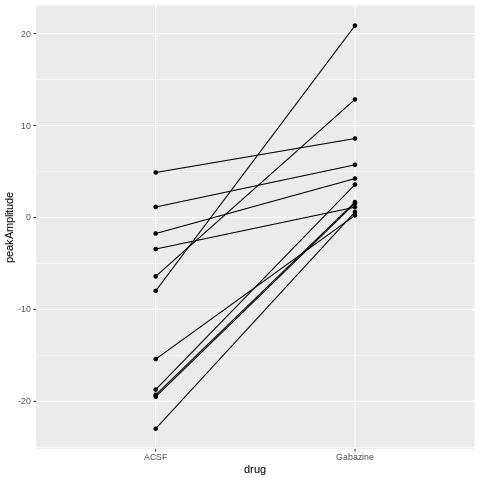

In [ ]:
%%R
ggplot(df, aes(x=drug, y=peakAmplitude)) +
  geom_point() +
  geom_line(aes(group=cell))

In [ ]:
%%R
wilcox.test(acsf,gabazine, paired=TRUE)


	Wilcoxon signed rank exact test

data:  acsf and gabazine
V = 0, p-value = 0.0009766
alternative hypothesis: true location shift is not equal to 0

